In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from hyperopt import hp
import plotly.graph_objects as go
import plotly.offline as py 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
employee_df = pd.read_csv("./dataset.csv")
_target_column = "Attrition"

In [52]:
employee_df.drop(columns=["EmployeeNumber"],inplace=True, axis=1)

In [53]:
# Checking nans
employee_df.isna().sum().sum()

0

In [54]:
# checking cloumns that contain single values
single_valued_column = [column for column in employee_df.columns if len(employee_df[column].unique()) < 2]

In [55]:
# droping single valued columns
df = employee_df.drop(columns= single_valued_column, axis=1)

In [56]:
def distribute_data_equally(df, target_column):
    df = df.copy()
    employee_attrition = df[df[target_column] == 1]
    employee_non_attrition = df[df[target_column] != 1] \
                        .sample(n = len(employee_attrition))
    df =  pd.concat([employee_attrition, employee_non_attrition])
    df = df.sample(frac=1).reset_index(drop=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [58]:
# apply label encoding to target column
label_encoder = LabelEncoder()
label_encoder.fit(df[_target_column])
df[_target_column] = label_encoder.transform(df[_target_column])

In [59]:
# feature encoding
object_cols = [col for col, dtype in df.dtypes.items() if dtype == "object" or dtype == "string"]
feature_encoder = OrdinalEncoder()
feature_encoder.fit(df[object_cols])
df[object_cols] = feature_encoder.transform(df[object_cols])

In [60]:
df = distribute_data_equally(df, _target_column)

In [61]:
# check the correlation between target and other columns
def correlation_heatmap(df):
    columns = df.columns
    data = [go.Heatmap(z=df[columns].corr().values,
              x=df[columns].columns.values,
              y=df[columns].columns.values,
              colorscale="Viridis",
              reversescale=False,
              opacity=1.0)]

    layout = go.Layout(
        title='Pearson Correlation of numerical features',
        xaxis = dict(ticks='', nticks=len(columns)),
        yaxis = dict(ticks='' ),
        width = 900, height = 700,
    )

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='labelled-heatmap')
correlation_heatmap(df)

In [62]:
y = df[_target_column]
X = df.drop(_target_column, axis=1)

# split dataset
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.20, random_state=42)
train_data.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)

In [63]:
print(f"Number of rows in train data: {len(train_data)}")
print(f"Number of rows in test data: {len(test_data)}")

Number of rows in train data: 379
Number of rows in test data: 95


In [64]:
lr = LogisticRegression()
lr.fit(train_data, train_labels)
y_pred = lr.predict(test_data)

c:\Users\muhammad.tayyab01\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.59      0.68      0.63        44
           1       0.68      0.59      0.63        51

    accuracy                           0.63        95
   macro avg       0.64      0.64      0.63        95
weighted avg       0.64      0.63      0.63        95

Total accuracy: 0.631578947368421


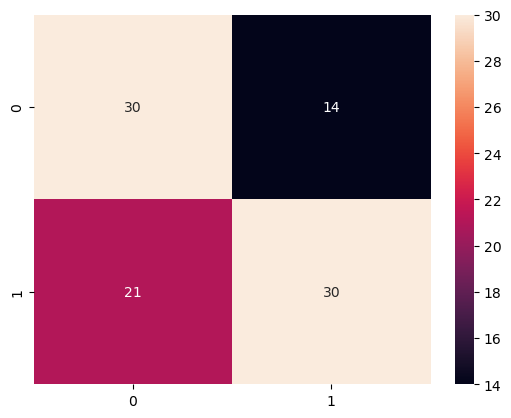

In [65]:
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(test_labels, y_pred))
print(f"Total accuracy: {accuracy_score(test_labels, y_pred)}")

Lets try random forest classifier for the same problem

In [66]:
rfc = RandomForestClassifier()
rfc.fit(train_data, train_labels)
y_pred = rfc.predict(test_data)

              precision    recall  f1-score   support

           0       0.63      0.77      0.69        44
           1       0.76      0.61      0.67        51

    accuracy                           0.68        95
   macro avg       0.69      0.69      0.68        95
weighted avg       0.70      0.68      0.68        95

Total accuracy: 0.6842105263157895


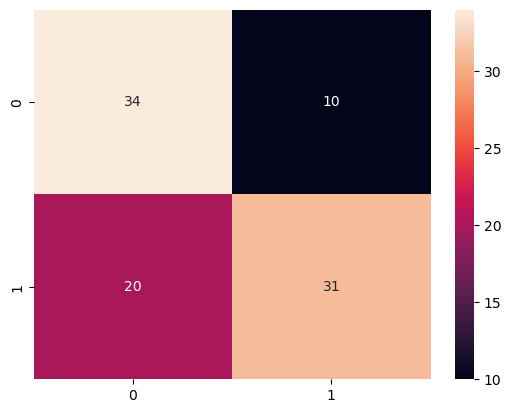

In [67]:
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(test_labels, y_pred))
print(f"Total accuracy: {accuracy_score(test_labels, y_pred)}")

Random Forest Classifier seems to work more well then default logistic regression classifier